In [1]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

# Load the cleaned and deduplicated dataset
file_path = 'S:/SJSU/DATA_226/group_project/daily_time_series_data_cleaned.csv'
data = pd.read_csv(file_path)

# Add 'Day of the Week' feature
data['Date'] = pd.to_datetime(data['Date'])
data['Day of the Week'] = data['Date'].dt.dayofweek  # Monday = 0, Sunday = 6

# Add lag features for 'Daily Sales' (e.g., sales from the previous day)
data['Lag_1_Day_Sales'] = data.groupby('SKU')['Daily Sales'].shift(1)
data['Lag_7_Day_Sales'] = data.groupby('SKU')['Daily Sales'].shift(7)

# Fill any NaN values created by lag features with 0 (or use another appropriate method)
data.fillna(0, inplace=True)

# Save the enhanced dataset
data.to_csv('enhanced_daily_time_series_data.csv', index=False)

# Display the first few rows to check the new features
print(data.head())


        Date Product type    SKU  Daily Sales  Stock Level  Price  \
0 2024-09-20     skincare  SKU35            6       999994  93.96   
1 2024-09-21     skincare  SKU35            2       999992  93.96   
2 2024-09-22     skincare  SKU35            4       999988  93.96   
3 2024-09-23     skincare  SKU35            2       999986  93.96   
4 2024-09-24     skincare  SKU35            2       999984  93.96   

   Revenue Generated  Season  Demand Factor  Day of the Week  Lag_1_Day_Sales  \
0             563.76  Summer       1.338618                4              0.0   
1             187.92  Summer       1.338618                5              6.0   
2             375.84  Summer       1.338618                6              2.0   
3             187.92  Summer       1.338618                0              4.0   
4             187.92  Summer       1.338618                1              2.0   

   Lag_7_Day_Sales  
0              0.0  
1              0.0  
2              0.0  
3             

C:\Users\saura\AppData\Local\Temp\ipykernel_25328\3551570980.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(performance_df['Model'], rotation=45)


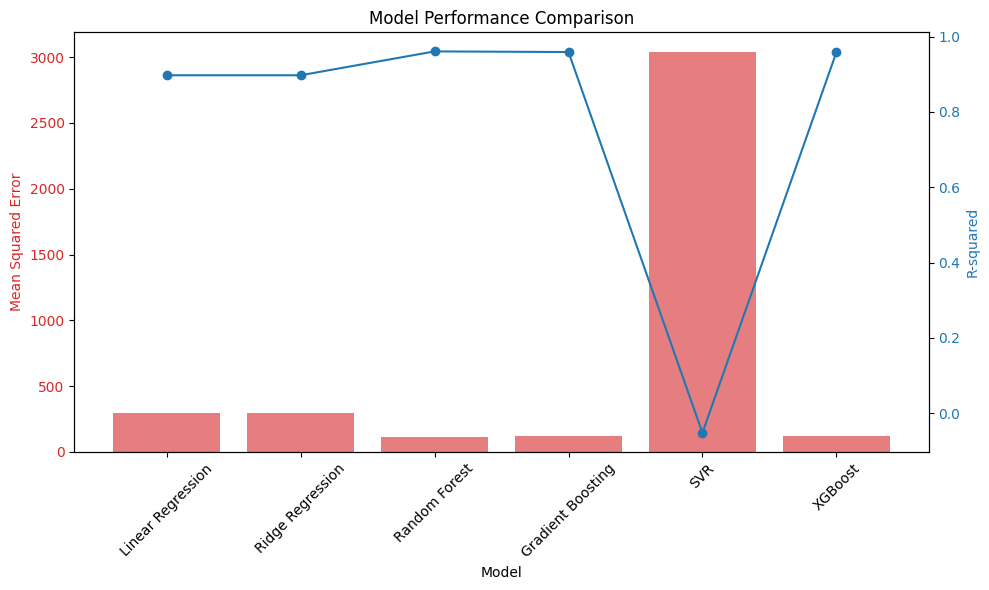

               Model          MSE  R-squared
0  Linear Regression   295.629631   0.897570
1   Ridge Regression   295.629492   0.897570
2      Random Forest   112.799264   0.960917
3  Gradient Boosting   117.580964   0.959260
4                SVR  3036.498790  -0.052089
5            XGBoost   120.345046   0.958303


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the enhanced dataset
file_path = 'S:/SJSU/DATA_226/group_project/enhanced_daily_time_series_data.csv'
data = pd.read_csv(file_path)

# Select features and target variable
features = ['Day of the Week', 'Price', 'Stock Level', 'Lag_1_Day_Sales', 'Lag_7_Day_Sales']
X = data[features]
y = data['Daily Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Evaluate models
model_performance = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_performance.append((model_name, mse, r2))

# Convert to DataFrame for easier analysis
performance_df = pd.DataFrame(model_performance, columns=["Model", "MSE", "R-squared"])

# Plot the performance
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MSE
ax1.set_xlabel('Model')
ax1.set_ylabel('Mean Squared Error', color='tab:red')
ax1.bar(performance_df['Model'], performance_df['MSE'], color='tab:red', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_xticklabels(performance_df['Model'], rotation=45)

# Plot R-squared
ax2 = ax1.twinx()
ax2.set_ylabel('R-squared', color='tab:blue')
ax2.plot(performance_df['Model'], performance_df['R-squared'], color='tab:blue', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and layout adjustments
plt.title('Model Performance Comparison')
fig.tight_layout()
plt.show()

# Display the performance metrics
print(performance_df)
